## Import packages

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

from statlearning import plot_dist

In [156]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train_Id=train['Id']
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [157]:
print('training data dimensions: ',np.shape(train))
print('test data dimensions: ',np.shape(test))

training data dimensions:  (1460, 81)
test data dimensions:  (1459, 80)


## Data cleaning

In [158]:
train.isna().sum().sort_values(ascending = False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [159]:
#Drop MACR variables
train = train.drop(['PoolQC','MiscFeature','Alley','Fence'], axis = 1)

In [160]:
#Prevent the original data from being lost
train_filling = train.copy()

In [161]:
#deal with missing value by filling no response

filling_no_response=['FireplaceQu','GarageType','GarageCond','BsmtFinType1','BsmtQual',
               'GarageFinish','GarageQual','BsmtFinType2','BsmtCond',
               'BsmtExposure']
train_filling[filling_no_response]=train_filling[filling_no_response].fillna('no response')

In [162]:
#deal with missing value by filling the average column value
train_filling['LotFrontage'].fillna(train_filling['LotFrontage'].mean(), inplace = True)
train_filling['MasVnrArea'].fillna(train_filling['MasVnrArea'].mean(), inplace = True)

In [163]:
train_filling.isna().sum().sort_values(ascending = False)

GarageYrBlt     81
MasVnrType       8
Electrical       1
SalePrice        0
ExterQual        0
                ..
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Id               0
Length: 77, dtype: int64

In [164]:
train_filling['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [165]:
train_filling['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [166]:
train_filling['MasVnrType'].mode()

0    None
dtype: object

In [167]:
train_filling['Electrical'].mode()

0    SBrkr
dtype: object

In [168]:
#deal with missing value by filling the most frequently value
train_filling['MasVnrType'].fillna('None', inplace = True)
train_filling['Electrical'].fillna('SErKr', inplace = True)
train_filling['GarageYrBlt'].fillna('2005.0', inplace = True)

In [169]:
train_filling.isna().sum().sort_values(ascending = False)

SalePrice       0
ExterCond       0
RoofStyle       0
RoofMatl        0
Exterior1st     0
               ..
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Id              0
Length: 77, dtype: int64

## Clean Test Dataset

In [170]:
#Drop MACR variables
test = test.drop(['PoolQC','MiscFeature','Alley','Fence','GarageYrBlt'], axis = 1)

In [171]:
#Prevent the original data from being lost
test_filling = test.copy()
test_filling

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [172]:
#deal with missing value by filling no response

filling_no_response=['FireplaceQu','GarageType','GarageCond','BsmtFinType1','BsmtQual','Utilities',
               'GarageFinish','GarageQual','BsmtFinType2','BsmtCond','Functional','Exterior1st',
               'BsmtExposure','MasVnrType','Electrical','MSZoning','Exterior2nd']
test_filling[filling_no_response]=test_filling[filling_no_response].fillna('no response')

In [173]:
#deal with missing value by filling the average column value

filling_mean=['LotFrontage','MasVnrArea','BsmtUnfSF','TotalBsmtSF','BsmtFinSF1',
               'GarageArea','BsmtFinSF2']
test_filling[filling_mean]=test_filling[filling_mean].fillna(test_filling[filling_mean].mean())

In [174]:
test_filling.isna().sum().sort_values(ascending=False)

BsmtHalfBath    2
BsmtFullBath    2
KitchenQual     1
SaleType        1
GarageCars      1
               ..
Electrical      0
CentralAir      0
HeatingQC       0
Heating         0
Id              0
Length: 75, dtype: int64

In [175]:
test_filling['BsmtFullBath'].value_counts()

0.0    849
1.0    584
2.0     23
3.0      1
Name: BsmtFullBath, dtype: int64

In [176]:
test_filling['BsmtHalfBath'].value_counts()

0.0    1364
1.0      91
2.0       2
Name: BsmtHalfBath, dtype: int64

In [177]:
test_filling['SaleType'].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
ConLw       3
Con         3
Name: SaleType, dtype: int64

In [178]:
test_filling['KitchenQual'].value_counts()

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [179]:
test_filling['BsmtFullBath'].mode()

0    0.0
dtype: float64

In [180]:
test_filling['BsmtHalfBath'].mode()

0    0.0
dtype: float64

In [181]:
test_filling['SaleType'].mode()

0    WD
dtype: object

In [182]:
test_filling['KitchenQual'].mode()

0    TA
dtype: object

In [183]:
test_filling['GarageCars'].mode()

0    2.0
dtype: float64

In [184]:
#deal with missing value by filling the most frequently value

test_filling['BsmtFullBath'].fillna('0.0', inplace = True)
test_filling['BsmtHalfBath'].fillna('0.0', inplace = True)
test_filling['SaleType'].fillna('WD', inplace = True)
test_filling['KitchenQual'].fillna('TA', inplace = True)
test_filling['GarageCars'].fillna('2', inplace = True)

In [185]:
test_filling.isna().sum().sort_values(ascending = False)

SaleCondition    0
YearBuilt        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Id               0
Length: 75, dtype: int64

## Encoding

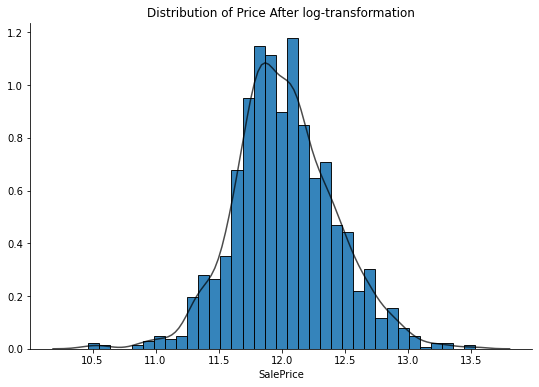

In [186]:
#log-transformation on y
log_y_train=np.log(train_filling['SalePrice'])
plot_dist(log_y_train)
plt.title('Distribution of Price After log-transformation')
plt.show()

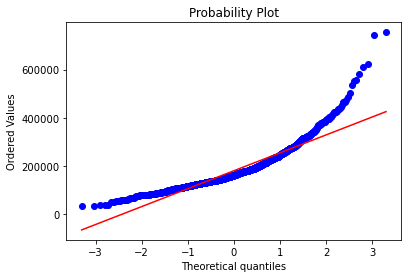

In [187]:
qq_plot = stats.probplot(train_filling['SalePrice'], plot=plt)

In [188]:
train_clean = train_filling.copy() 
test_clean = test_filling.copy()

In [189]:
train_clean.dtypes.sort_values()

Id              int64
BsmtUnfSF       int64
TotalBsmtSF     int64
1stFlrSF        int64
2ndFlrSF        int64
                ...  
HouseStyle     object
BldgType       object
Foundation     object
CentralAir     object
Heating        object
Length: 77, dtype: object

In [190]:
#Divide all data into numerical data and categorical data
categorical_variables = train_clean.columns[train_clean.dtypes=='object']
nemerical_variables = train_clean.columns[train_clean.dtypes!='object']

In [191]:
#check how many types in each categorical feature
train_clean[categorical_variables].nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        6
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageYrBlt      98
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

<AxesSubplot:>

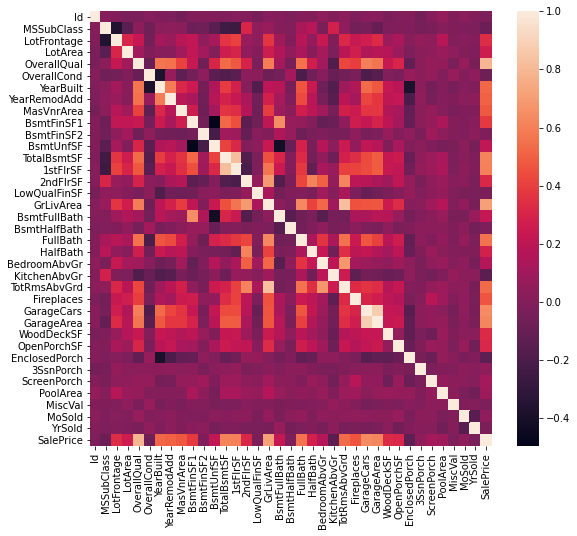

In [192]:
# Correlation Matrix
corr_matrix = train_clean.corr()

plt.figure(figsize = (9,8)) # figure size
sns.heatmap(corr_matrix)

In [193]:
n_var = 21
corr_matrix["SalePrice"].sort_values(ascending=False).head(n_var)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.334901
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
Name: SalePrice, dtype: float64

In [194]:
X = pd.get_dummies(train_clean[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF',
                                         '1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd',
                                         'MasVnrArea','Fireplaces','BsmtFinSF1','LotFrontage','WoodDeckSF',
                                         '2ndFlrSF','OpenPorchSF','HalfBath','LotArea','BsmtFullBath']], drop_first=True)
X.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath
0,7,1710,2,548,856,856,2,8,2003,2003,196.0,0,706,65.0,0,854,61,1,8450,1
1,6,1262,2,460,1262,1262,2,6,1976,1976,0.0,1,978,80.0,298,0,0,0,9600,0
2,7,1786,2,608,920,920,2,6,2001,2002,162.0,1,486,68.0,0,866,42,1,11250,1
3,7,1717,3,642,756,961,1,7,1915,1970,0.0,1,216,60.0,0,756,35,0,9550,1
4,8,2198,3,836,1145,1145,2,9,2000,2000,350.0,1,655,84.0,192,1053,84,1,14260,1


In [195]:
y = log_y_train

In [196]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## OLS

In [197]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [198]:
# print the intercept
print(model.intercept_)

3.2959395573606347


In [199]:
predictions = model.predict(X_test)
predictions

array([12.24844152, 11.94458176, 11.59922304, 11.35778109, 11.79259655,
       12.64061815, 12.57213538, 12.01842672, 12.28892459, 12.27944846,
       11.99179003, 11.04722649, 12.34213882, 12.85058224, 12.34320291,
       11.55556215, 11.58270673, 11.74274585, 12.26498708, 11.84305972,
       11.60807418, 11.71005085, 12.40684843, 12.78240403, 11.64247308,
       12.11545974, 11.8361068 , 12.13864701, 12.94540349, 11.8361701 ,
       11.83222491, 11.76118372, 11.60679872, 11.45391176, 11.86882533,
       12.85876033, 11.87290956, 11.27230358, 12.46377086, 11.59882092,
       11.90275549, 11.83725666, 11.5578513 , 11.72043204, 12.12922897,
       12.08842035, 11.71873737, 12.18357738, 12.45505579, 12.47514124,
       11.49256901, 12.51023117, 11.56320142, 12.38069081, 12.20979349,
       11.49170252, 11.62505558, 12.1805031 , 11.59718115, 12.08322662,
       11.92555241, 12.50256077, 11.43140708, 11.70361685, 11.95841113,
       11.75809719, 11.75540838, 12.30810663, 11.97292139, 11.89

<AxesSubplot:xlabel='SalePrice'>

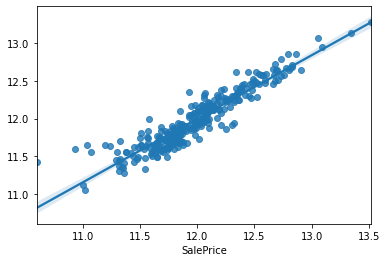

In [200]:
sns.regplot(y_test,predictions)

In [201]:
import statsmodels.api as sm

In [202]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     388.9
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:55:53   Log-Likelihood:                 624.27
No. Observations:                1460   AIC:                            -1207.
Df Residuals:                    1439   BIC:                            -1096.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.2772      0.579      5.665   

## Ridge

In [136]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5)

In [137]:
len(X_train.columns) - np.sum(ridge.coef_==0.0)

20

In [138]:
ridge.score(X_train, y_train)

0.8351822529716306

## Lasso

In [139]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5)
lasso.fit(X_train, y_train)

LassoCV(cv=5)

In [140]:
len(X_train.columns) - np.sum(lasso.coef_==0.0)

10

In [141]:
lasso.score(X_train, y_train)

0.7503646312068313

## Elastic Net

In [142]:
from sklearn.linear_model import ElasticNetCV

ratio = [X*0.1 for X in range(1, 10)]
ratio.append(0.01)
ratio.append(0.99)
enet = ElasticNetCV(l1_ratio=ratio, cv=5)
enet.fit(X_train, y_train)

ElasticNetCV(cv=5,
             l1_ratio=[0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                       0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 0.01,
                       0.99])

In [143]:
enet.l1_ratio_

0.99

In [144]:
len(X_train.columns) - np.sum(enet.coef_==0.0)

10

In [145]:
enet_coeff = pd.DataFrame(np.c_[X_train.columns, enet.coef_], columns=['features', 'coeff'])
enet_coeff

,features,coeff
0,OverallQual,0
1,GrLivArea,0.000313029
2,GarageCars,0
3,GarageArea,0.000387697
4,TotalBsmtSF,0.000147851
5,1stFlrSF,0
6,FullBath,0
7,TotRmsAbvGrd,0
8,YearBuilt,0.00241908
9,YearRemodAdd,0.00135343


In [146]:
enet.score(X_train, y_train)

0.7503640206185109

In [153]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

models = ['ridge', 'lasso', 'enet']
rmse_scores = []
R2_scores = []
for m in models:
    predicted = cross_val_predict(eval(m), X_train, y_train, cv=5)
    rmse_score = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(predicted)))
    R2_score = r2_score(np.exp(y_train), np.exp(predicted))
    rmse_scores.append(rmse_score)
    R2_scores.append(R2_score)
socres_df = pd.DataFrame(np.c_[rmse_scores, R2_scores], index=models, columns=['RMSE', 'R2'])

In [154]:
socres_df

,RMSE,R2
ridge,80755.593994,-0.070459
lasso,146635.701224,-2.529426
enet,146636.106796,-2.529446
